In [1]:
from data_processing import *
from plot_functions import *
import argparse
import numpy as np
import pandas as pd
from pymol import cmd


parser = argparse.ArgumentParser(description='Statistical analysis of HDX/MS data for curated RbsR peptides in one or more functional states.')
parser.add_argument('--pm', dest='pm', help="path to pymol structure", required=True)
parser.add_argument('--t', '--table', dest='table', help="path to uptake table", nargs='+', required=True)
parser.add_argument('--r', '--ranges', dest='ranges', help='path to ranges list csv')
parser.add_argument('--e', '--exclude', dest='exclude', action='store_true', help='exclude rather than include rangeslist')
parser.add_argument('--s1', dest='s1', help='first state to compare')
parser.add_argument('--s2', dest='s2', help='second state to compare')
parser.add_argument('--compare', dest='compare', help='dna, ligand, both', nargs=3)
parser.add_argument('--cbarmax', dest='cbarmax', type=float, help='max value for colorbar axis for dDbar')
parser.add_argument('--ldmin', dest='ldmin', type=float, help='in dDbar, minimum difference threshold between ligand/dna states')



args = parser.parse_args(args=['--t', './EcPFK_20230707_BioRep1/peptide_pool_20230724.csv','./EcPFK_20230424/peptide_pool_20230502.csv'
                               '--r', './EcPFK_20230707_BioRep1/ranges_list_e.csv', 
                               '--pm', '../example/2dri_protein.pdb',])

#args.table = ['../example/10-25_rbsb_pool_results-CLEANED.csv']
#args.ranges = ['../example/rangeslist-10-25-select-cleaned.csv']



# Load the data and creat HDXMSdata object

In [2]:
tables = ['../example/10-25_rbsb_pool_results-CLEANED.csv']
ranges = ['../example/rangeslist-10-25-select-cleaned.csv']
cleaned = read_hdx_tables(tables, ranges, exclude=False)

tables2 = ['../example/10-18-RbsB_peptide_pool_results-CLEAN.csv']
ranges2 = ['../example/rangeslist-10-18-select-cleaned.csv']
cleaned2 = read_hdx_tables(tables2, ranges2, exclude=False)

rangeslist included !
rangeslist included !


In [3]:
cleaned2 

,Sequence,Deut Time (sec),Protein State,Start,End,#D,Stddev,#Rep
226,VALSATVS,0.0,APO,13,20,0.0000,0.000000,1
227,VALSATVS,0.0,RIB,13,20,0.0000,0.000000,1
1808,VALSATVS,30.0,APO,13,20,1.8860,NaN,1
1809,VALSATVS,30.0,RIB,13,20,1.3920,NaN,1
1810,VALSATVS,120.0,APO,13,20,1.4530,NaN,1
...,...,...,...,...,...,...,...,...
2059,YPVDLK,3840.0,RIB,286,291,2.2285,0.006364,2
2060,YPVDLK,7680.0,APO,286,291,2.4470,0.056569,2
2061,YPVDLK,7680.0,RIB,286,291,2.3755,0.002121,2
2062,YPVDLK,15360.0,APO,286,291,2.6120,0.073539,2


In [4]:
cleaned

,Sequence,Deut Time (sec),Protein State,Start,End,#D,Stddev,#Rep
60,AVALSATVSANA,0.0,APO,12,23,0.000000,0.000000,1
61,AVALSATVSANA,0.0,RIB,12,23,0.000000,0.000000,1
480,AVALSATVSANA,30.0,APO,12,23,0.691333,0.039273,3
481,AVALSATVSANA,30.0,RIB,12,23,0.608333,0.112882,3
482,AVALSATVSANA,120.0,APO,12,23,0.980500,0.088388,2
...,...,...,...,...,...,...,...,...
2699,PVDLKL,3840.0,RIB,287,292,2.118000,NaN,1
2700,PVDLKL,7680.0,APO,287,292,2.227000,NaN,1
2701,PVDLKL,7680.0,RIB,287,292,2.290000,NaN,1
2702,PVDLKL,15360.0,APO,287,292,2.399000,NaN,1


In [5]:
hdxms_data = load_dataframe_to_hdxmsdata(cleaned)
hdxms_data.reindex_peptide_from_pdb(args.pm, first_residue_index=1)

hdxms_data2 = load_dataframe_to_hdxmsdata(cleaned2)
hdxms_data2.reindex_peptide_from_pdb(args.pm, first_residue_index=1)

hdxms_data_list = [hdxms_data, hdxms_data2]

Peptide reindexed with offset -25
Peptide reindexed with offset -25


In [6]:
state_i = hdxms_data.states[0]

In [7]:
hdxms_data.states[0].num_peptides

224

In [8]:
hdxms_data2.states[1].num_peptides

129

# Make uptake plot

In [12]:
# make a uptake plot for specific peptide
uptate = UptakePlot([hdxms_data, hdxms_data2], hdxms_data.states[0].peptides[0].sequence, if_plot_fit=True)
fig = uptate.uptakeplot


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


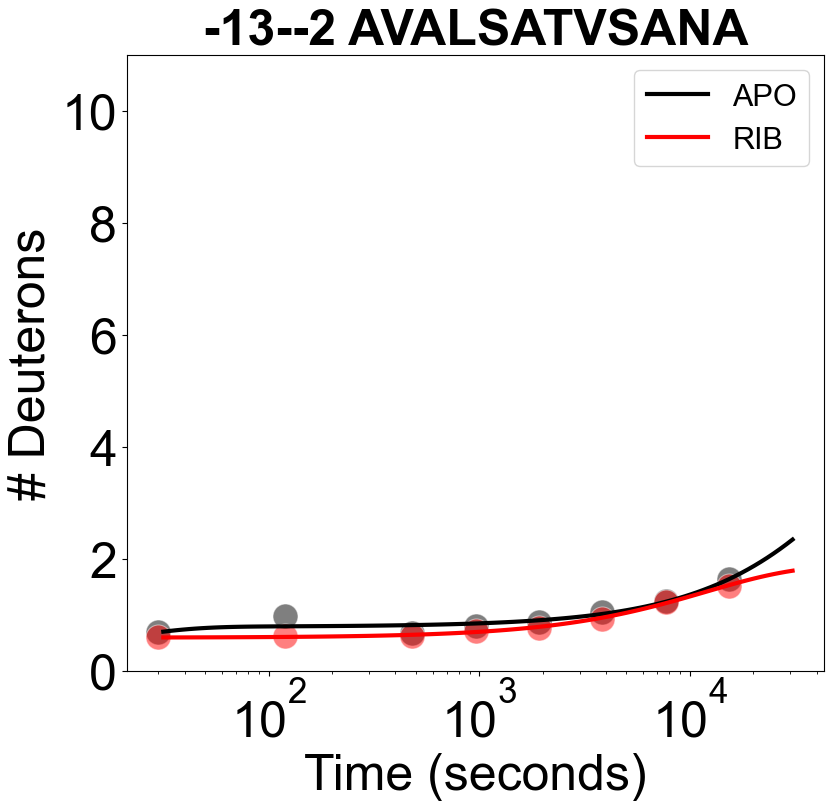

In [13]:
fig

/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


KeyboardInterrupt: 

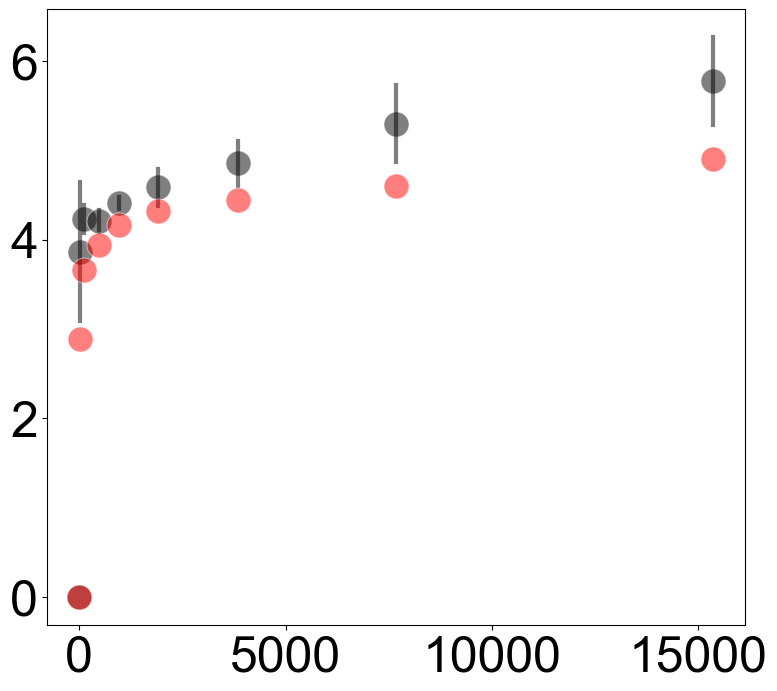

In [18]:
# make a uptake plot for all the peptides in hdms_data
uptakes = UptakePlotsCollection(if_plot_fit=True)
uptakes.add_plot_all([hdxms_data, hdxms_data2])
# save all the plots
uptakes.save_plots('/Users/chenlin/Downloads/')

In [ ]:
hdxms_data

# Compare different protein states

### make compare object

In [9]:
# make compare object

state1 = 'APO'
state2 = 'RIB'

state1_list = [i.get_state(state1) for i in hdxms_data_list]
state2_list = [i.get_state(state2) for i in hdxms_data_list]

compare = HDXStatePeptideCompares(state1_list, state2_list)
compare.add_all_compare()

compare1 = HDXStatePeptideCompares([hdxms_data.get_state(state1)], [hdxms_data.get_state(state2)])
compare1.add_all_compare()

In [11]:
res_compares = HDXStateResidueCompares([i for i in range(1, 320)], state1_list, state2_list)
res_compares.add_all_compare()

create_compare_pymol_plot(res_compares, 0.2, pdb_file=args.pm, save_pdb=True,
                          path='/Users/chenlin/Downloads/')

In [ ]:
compare.peptide_compares[0].compare_info

'APO-RIB: -13--2 AVALSATVSANA'

### plot heatmap

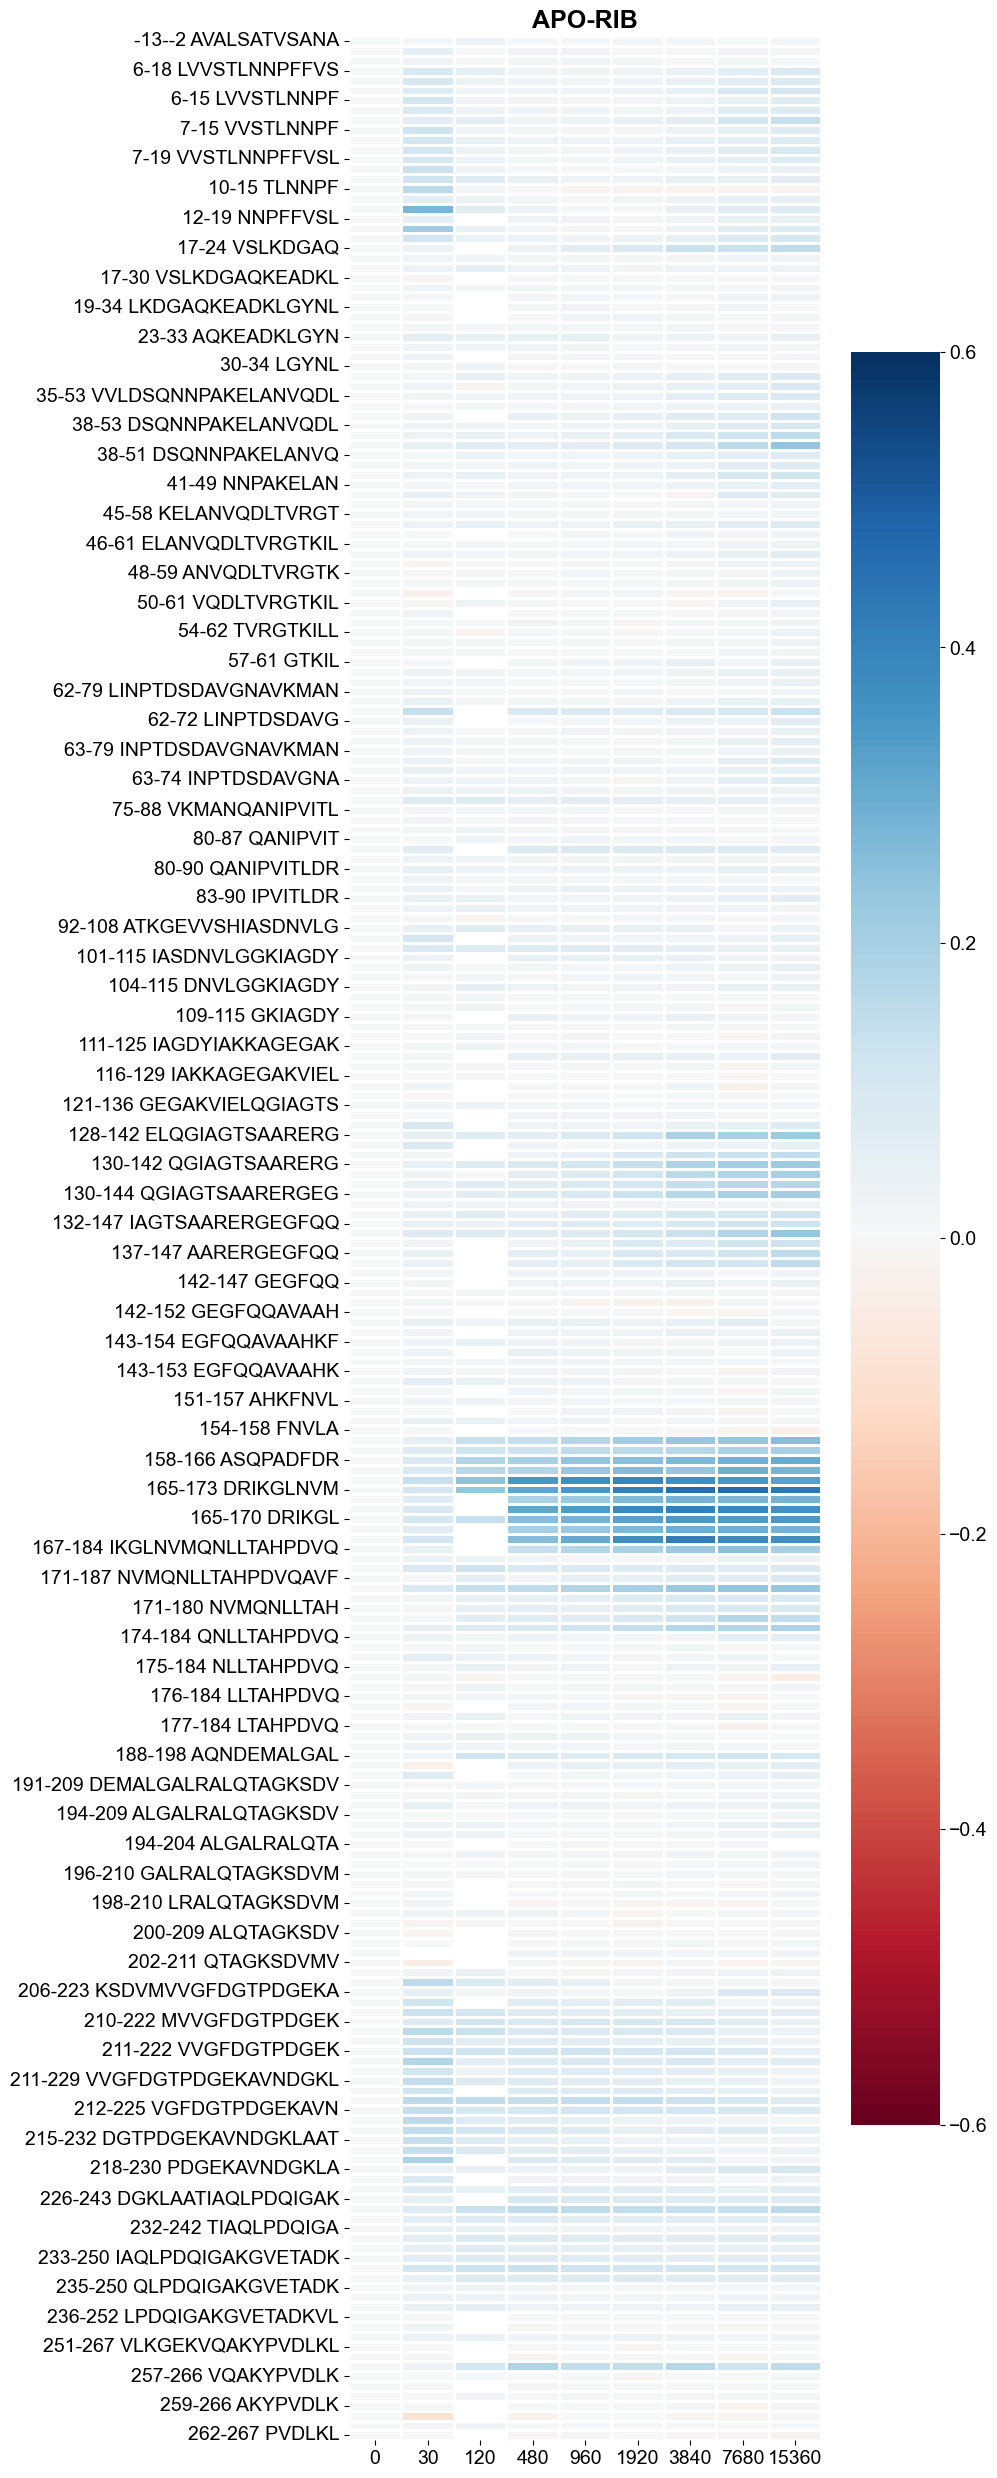

In [ ]:
create_heatmap_compare_tp(compare, 0.6)

### plot to pymol

In [ ]:
#create_compare_pymol_plot(compare, colorbar_max=0.05, pdb_file='../example/2dri_protein.pdb', path='/Users/chenlin/Downloads/')

### make all the plots and save them




In [ ]:
from itertools import product

items =[state.state_name for state in hdxms_data.states]
combinations = product(['APO'], [x for x in items if x != 'APO'])


OUTDIR = '/Users/chenlin/Downloads/rbsb_output/'
if not os.path.exists(OUTDIR):
    os.makedirs(OUTDIR)

for state1_name, state2_name in combinations:

    state1_list = [i.get_state(state1_name) for i in hdxms_data_list]
    state2_list = [i.get_state(state2_name) for i in hdxms_data_list]

    compare = HDXStatePeptideCompares(state1_list, state2_list)
    compare.add_all_compare()

    heatmap_compare_tp = create_heatmap_compare_tp(compare, 0.5)
    heatmap_compare_tp.savefig(f'{OUTDIR}/{state1}-{state2}-heatmap-tp.png')

    heatmap_compare = create_heatmap_compare(compare, 0.5)
    heatmap_compare.savefig(f'{OUTDIR}/{state1}-{state2}-heatmap.png')

    create_compare_pymol_plot(compare, colorbar_max=0.2, pdb_file=args.pm, path=OUTDIR)



    res_compares = HDXStateResidueCompares([i for i in range(1, 320)], state1_list, state2_list)
    res_compares.add_all_compare()

    create_compare_pymol_plot(res_compares, 0.2, pdb_file=args.pm, path=OUTDIR)

In [ ]:
hdxms_data.